# Importando o dataframe e as libs

In [1]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_percentage_error,mean_absolute_error
from sklearn.feature_selection import *
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import *
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor 
from kneed import KneeLocator
import seaborn as sns
from sklearn.svm import *
from sklearn.ensemble import *
import numpy as np
from datetime import datetime, date, timedelta
from sklearn import metrics
import glob
import os
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

cwd = os.getcwd()


%matplotlib inline



# Verificando o  dataframe

In [2]:
#importando o dataframe
df = pd.read_csv(".\\cota_hist\\cotacoes.csv.zip",compression='zip',index_col="index")
df.sample(5)

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_max,preco_min,preco_fechamento,qtd_negocios,vol_negocios,tipo
index,,,,,,,,,,
29401,2021-12-09,CIEL3,CIELO,2.30,2.33,2.24,2.24,25251200,5734968900,ON EJ NM
109423,2017-05-25,TOTS3,TOTVS,29.60,29.92,29.12,29.15,340400,999354200,ON NM
58591,2019-11-14,FLRY3,FLEURY,26.00,27.00,25.97,27.00,2690100,7162684400,ON NM
52509,2019-04-25,ENBR3,ENERGIAS BR,17.40,17.64,17.02,17.52,2400400,4185132100,ON NM
46305,2018-03-28,ELET3,ELETROBRAS,21.89,21.89,20.75,21.11,2205700,4678756300,ON N1


In [3]:
df.describe()

,preco_abertura,preco_max,preco_min,preco_fechamento,qtd_negocios,vol_negocios
count,148259.000000,148259.000000,148259.000000,148259.000000,1.482590e+05,1.482590e+05
mean,26.728911,27.179908,26.253917,26.721135,8.133615e+06,1.655556e+10
std,20.978023,21.356586,20.620934,21.024284,1.498295e+07,3.172388e+10
min,0.670000,0.690000,0.630000,0.660000,1.000000e+02,1.400000e+04
25%,13.420000,13.670000,13.160000,13.410000,1.391650e+06,3.284075e+09
50%,22.110000,22.510000,21.700000,22.100000,3.459600e+06,7.847814e+09
75%,34.570000,35.120000,33.990000,34.560000,8.892000e+06,1.675873e+10
max,579.000000,622.000000,561.420000,621.790000,4.991948e+08,1.099640e+12


# Retorno diário

In [4]:
%%capture
#dataframe de ações
array_siglas = df["sigla_acao"].unique()

df_enriquecido = pd.DataFrame()
for i in array_siglas:  
    #ordenando por index
    df_sigla = df[df["sigla_acao"] == i].sort_values(["data_pregao"])
    #retorno
    df_sigla["variacao"]=df_sigla["preco_fechamento"].diff()
    #taxas de retorno
    df_sigla["taxa_de_retorno_simples_diaria"]=df_sigla["variacao"]/df_sigla["preco_fechamento"].shift(1)  
    df_enriquecido = df_enriquecido.append(df_sigla)


In [5]:
df_enriquecido[["data_pregao","sigla_acao","preco_fechamento","variacao","taxa_de_retorno_simples_diaria"]].sample(5)

,data_pregao,sigla_acao,preco_fechamento,variacao,taxa_de_retorno_simples_diaria
index,,,,,
7338,2020-08-27,BBAS3,32.75,0.30,0.009245
143335,2021-03-31,TIMS3,12.67,-0.21,-0.016304
45217,2021-11-04,ECOR3,8.63,-0.18,-0.020431
71727,2016-12-12,JBSS3,10.82,-0.20,-0.018149
128156,2022-03-18,EGIE3,40.90,-0.15,-0.003654


In [6]:
df_enriquecido["sigla_acao"].unique()

array(['ABEV3', 'ALPA4', 'ARZZ3', 'BBAS3', 'BBDC3', 'BBDC4', 'BBSE3',
       'BEEF3', 'BPAN4', 'BRAP4', 'BRFS3', 'BRKM5', 'BRML3', 'CCRO3',
       'CIEL3', 'CMIG4', 'CPFE3', 'CPLE6', 'CSAN3', 'CSNA3', 'CVCB3',
       'CYRE3', 'ECOR3', 'ELET3', 'ELET6', 'EMBR3', 'ENBR3', 'EQTL3',
       'EZTC3', 'FLRY3', 'GGBR4', 'GOAU4', 'GOLL4', 'HYPE3', 'ITSA4',
       'ITUB4', 'JBSS3', 'KLBN11', 'LREN3', 'MGLU3', 'MRFG3', 'MRVE3',
       'MULT3', 'PETR3', 'PETR4', 'POSI3', 'QUAL3', 'RADL3', 'RENT3',
       'SANB11', 'SBSP3', 'SLCE3', 'SMTO3', 'SULA11', 'TAEE11', 'TOTS3',
       'UGPA3', 'USIM5', 'VALE3', 'VIVT3', 'WEGE3', 'ENGI11', 'PRIO3',
       'PCAR3', 'ENEV3', 'EGIE3', 'BPAC11', 'RAIL3', 'AZUL4', 'CRFB3',
       'IRBR3', 'SUZB3', 'B3SA3', 'HAPV3', 'YDUQ3', 'COGN3', 'NTCO3',
       'LWSA3', 'SOMA3', 'PETZ3', 'TIMS3', 'CASH3', 'RRRP3', 'RDOR3',
       'CMIN3', 'ASAI3', 'AMER3', 'DXCO3', 'IGTI11', 'RAIZ4', 'VBBR3',
       'VIIA3'], dtype=object)

# Retorno médio anual e volatilidade

In [7]:
df_estatistico = df_enriquecido.groupby('sigla_acao').agg(
   preco_fechamento_min=pd.NamedAgg(column="preco_fechamento", aggfunc="min"),
   preco_fechamento_medio=pd.NamedAgg(column="preco_fechamento", aggfunc="mean"),
   preco_fechamento_inicial=pd.NamedAgg(column="preco_fechamento", aggfunc="first"),
   preco_fechamento_final=pd.NamedAgg(column="preco_fechamento", aggfunc="last"),
   preco_fechamento_variancia=pd.NamedAgg(column="preco_fechamento", aggfunc="var"),
   taxa_de_retorno_media_diaria=pd.NamedAgg(column="taxa_de_retorno_simples_diaria", aggfunc='mean'),
   desvpad_medio_diario = pd.NamedAgg(column="taxa_de_retorno_simples_diaria", aggfunc='std'))

df_estatistico["taxa_de_retorno_media_anual"]=df_estatistico["taxa_de_retorno_media_diaria"]*250 #pregões anuais
df_estatistico["taxa_de_retorno_media_anual"] = df_estatistico["taxa_de_retorno_media_anual"]

df_estatistico["volatilidade"]=df_estatistico["desvpad_medio_diario"]*250**0.5 #a volatilidade é o desvio padrão anualizado
    
df_estatistico["percentual_retorno"] = 100*(df_estatistico["preco_fechamento_final"] - df_estatistico["preco_fechamento_inicial"])/df_estatistico["preco_fechamento_inicial"]
df_estatistico= df_estatistico.dropna()

df_estatistico = df_estatistico[df_estatistico["percentual_retorno"]>0]
df_estatistico = df_estatistico[df_estatistico["taxa_de_retorno_media_anual"]>0]
df_estatistico=df_estatistico[["taxa_de_retorno_media_diaria","desvpad_medio_diario","taxa_de_retorno_media_anual","volatilidade"]]
df_estatistico = df_estatistico.round(6)
df_estatistico.sample(5)

,taxa_de_retorno_media_diaria,desvpad_medio_diario,taxa_de_retorno_media_anual,volatilidade
sigla_acao,,,,
BBAS3,0.000604,0.027783,0.151036,0.439283
BRAP4,0.000984,0.032460,0.245981,0.513242
GOAU4,0.000658,0.033585,0.164547,0.531025
SUZB3,0.001034,0.027029,0.258537,0.427366
ENGI11,0.000962,0.020299,0.240614,0.320948


In [8]:
df_estatistico[df_estatistico.columns[0]].count()

41

# Vizualizando os dados por volatilidade e taxa de retorno media anual

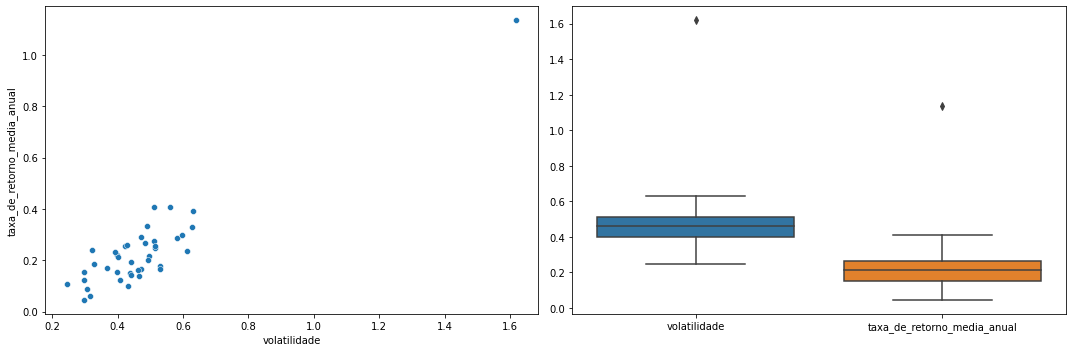

In [9]:
#cada ponto em azul significa uma ação diferente.
plt.subplots(figsize=(15, 5)) 
plt.subplot(1, 2, 1)    
sns.scatterplot(data=df_estatistico, x= "volatilidade", y="taxa_de_retorno_media_anual")
plt.subplot(1, 2, 2)    
sns.boxplot(df_estatistico[['volatilidade',"taxa_de_retorno_media_anual"]])
plt.tight_layout() 
plt.show()


# Removendo outliers - IQR

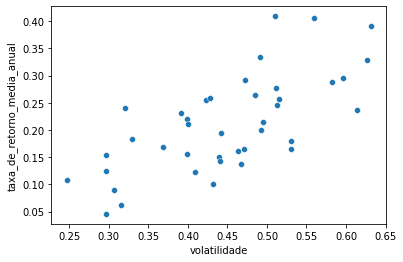

In [10]:
#Removendo outliers

def remove_outlier(df_in, col_names):
    df_out=df_in
    for col_name in col_names :
        q1 = df_in[col_name].quantile(0.25)
        q3 = df_in[col_name].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        df_out = df_out.loc[(df_out[col_name] > fence_low) & (df_out[col_name] < fence_high)]
        
    return df_out
df_estatistico = remove_outlier(df_estatistico,["taxa_de_retorno_media_anual","volatilidade"])

sns.scatterplot(data=df_estatistico, x= "volatilidade", y="taxa_de_retorno_media_anual")
plt.show() 



# Análise de clusters - definindo o número de clusters ideal 

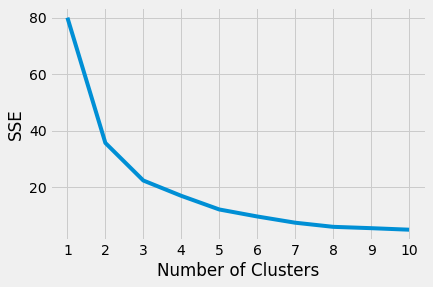

elbows 3


In [11]:
def elbow_definition(features):
    kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 600,
        "random_state": 42,
    }
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(scaled_features)
        sse.append(kmeans.inertia_)
    plt.style.use("fivethirtyeight")
    plt.plot(range(1, 11), sse)
    plt.xticks(range(1, 11))
    plt.xlabel("Number of Clusters")
    plt.ylabel("SSE")
    plt.show()
    kl = KneeLocator(
        range(1, 11), sse, curve="convex", direction="decreasing"
    )
    return kl.elbow

elbow1 = elbow_definition(df_estatistico[["taxa_de_retorno_media_anual","volatilidade"]])
print("elbows",elbow1)

# Clusterizando pelo número ótimo de clusters (3)

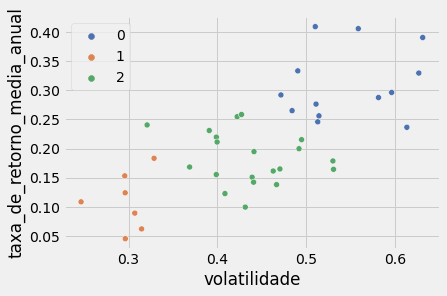

In [12]:
kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 600,
        "random_state": 42,
    }

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_estatistico[["taxa_de_retorno_media_anual","volatilidade"]])

kmeans = KMeans(n_clusters=elbow1, **kmeans_kwargs)
kmeans.fit(scaled_features)
y_kmeans = kmeans.predict(scaled_features)

sns.scatterplot(data=df_estatistico,  x= "volatilidade", y="taxa_de_retorno_media_anual", hue=y_kmeans, palette="deep",sizes=(400, 400))
plt.show() 

# Agregando indicadores e cluster ao dataframe de pregões diários

In [13]:
#craindo uma coluna com o valor do cluster
df_estatistico["cluster"] = y_kmeans
df_estatistico.sample(5)

,taxa_de_retorno_media_diaria,desvpad_medio_diario,taxa_de_retorno_media_anual,volatilidade,cluster
sigla_acao,,,,,
HYPE3,0.000734,0.020794,0.183446,0.328788,1
POSI3,0.001562,0.039942,0.390493,0.631546,0
RENT3,0.000800,0.031125,0.199878,0.492137,2
CYRE3,0.000553,0.029525,0.138298,0.466833,2
ENBR3,0.000613,0.018707,0.153342,0.295776,1


In [14]:
df_estatistico[df_estatistico.columns[0]].count()

40

In [15]:
#Enriquecendo o dataframe de cotações diárias com os : trazendo para o dataframe via inner join (merge)
df =  pd.merge(df_enriquecido, df_estatistico, left_on="sigla_acao", right_index=True) 
df.sample(5)

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_max,preco_min,preco_fechamento,qtd_negocios,vol_negocios,tipo,variacao,taxa_de_retorno_simples_diaria,taxa_de_retorno_media_diaria,desvpad_medio_diario,taxa_de_retorno_media_anual,volatilidade,cluster
index,,,,,,,,,,,,,,,,,
17240,2020-08-31,BPAN4,BANCO PAN,8.57,8.68,8.27,8.47,7412100,6270498200,PN N1,-0.20,-0.023068,0.001185,0.037726,0.296281,0.596508,0
3201,2019-12-10,ALPA4,ALPARGATAS,31.70,32.00,31.32,32.00,999100,3165464500,PN N1,0.27,0.008509,0.000780,0.027917,0.194908,0.441411,2
82187,2019-05-09,MRVE3,MRV,15.02,15.88,15.02,15.60,8522200,13209720900,ON NM,0.67,0.044876,0.000399,0.027295,0.099791,0.431578,2
96454,2020-12-23,RENT3,LOCALIZA,65.30,66.90,64.92,66.60,3275700,21701083600,ON NM,1.72,0.026510,0.000800,0.031125,0.199878,0.492137,2
23322,2021-06-09,BRKM5,BRASKEM,56.43,57.86,54.77,57.03,3956900,22264752600,PNA N1,0.66,0.011708,0.000715,0.033542,0.178859,0.530339,2


In [16]:
#colunas
df.columns

Index(['data_pregao', 'sigla_acao', 'nome_acao', 'preco_abertura', 'preco_max',
       'preco_min', 'preco_fechamento', 'qtd_negocios', 'vol_negocios', 'tipo',
       'variacao', 'taxa_de_retorno_simples_diaria',
       'taxa_de_retorno_media_diaria', 'desvpad_medio_diario',
       'taxa_de_retorno_media_anual', 'volatilidade', 'cluster'],
      dtype='object')

In [17]:
#array de ações
array_siglas = df["sigla_acao"].unique()
array_siglas

array(['ALPA4', 'ARZZ3', 'BBAS3', 'BBSE3', 'BEEF3', 'BPAN4', 'BRAP4',
       'BRKM5', 'CPFE3', 'CSNA3', 'CYRE3', 'ELET3', 'ELET6', 'ENBR3',
       'GGBR4', 'GOAU4', 'HYPE3', 'JBSS3', 'KLBN11', 'MRFG3', 'MRVE3',
       'PETR3', 'PETR4', 'POSI3', 'RENT3', 'SANB11', 'SBSP3', 'SLCE3',
       'SULA11', 'TAEE11', 'USIM5', 'VALE3', 'VIVT3', 'WEGE3', 'ENGI11',
       'ENEV3', 'BPAC11', 'RAIL3', 'SUZB3', 'RRRP3'], dtype=object)

# Adicionando indicadores de análise técnica

In [18]:
%%capture
df_enriched = pd.DataFrame()
for i in array_siglas:
    #ordenando por data
    df_sigla = df[df["sigla_acao"] == i].sort_values(["data_pregao"])
    
    #Bandas de Bollinger
    for n in [5,13,60,200]:
        df_sigla[f"mm_{n}_dias"]=df_sigla["preco_fechamento"].rolling(n).mean()#meio
        df_sigla[f"desv_pad_{n}_dias"]=df_sigla["preco_fechamento"].rolling(n).std()#desvio padrao
        k = 2 #padrão
        df_sigla[f"banda_superior_{n}_dias"]=df_sigla[f"mm_{n}_dias"] + k*df_sigla[f"desv_pad_{n}_dias"] #banda superior
        df_sigla[f"banda_inferior_{n}_dias"]=df_sigla[f"mm_{n}_dias"] - k*df_sigla[f"desv_pad_{n}_dias"] #banda inferior
        df_sigla[f"volatilidade_entre_bandas_{n}_dias"] = 2*k*df_sigla[f"desv_pad_{n}_dias"] #diferença entre bandas
        df_sigla[f"diferenca_fechamento_e_mm_{n}_dias"] = df_sigla["preco_fechamento"] - df_sigla[f"mm_{n}_dias"]  
        
        
    #IFR — Índice de Força Relativa    
    df_sigla["ganho"] = np.where(df_sigla['variacao'] > 0, df_sigla['variacao'], 0) 
    df_sigla["perda"] = np.where(df_sigla['variacao'] < 0, df_sigla['variacao'].abs(), 0) 
    #De acordo com J. Welles Wilder, criador do indicador, os parâmetros recomendados para análise são um período de 14 dias.
    #Valores acima de 70 sugerem um ativo sobrecomprado e abaixo de 30 indicam um ativo sobrevendido.
    n=14
    df_sigla[f"mm_{n}_dias_ganho"]=df_sigla["ganho"].rolling(n).mean()
    df_sigla[f"mm_{n}_dias_perda"]=df_sigla["perda"].abs().rolling(n).mean() #em absolutos
    df_sigla["fr_simples"] =df_sigla[f"mm_{n}_dias_ganho"]/df_sigla[f"mm_{n}_dias_perda"]
    df_sigla["fr_classica"] = (df_sigla[f"mm_{n}_dias_ganho"].shift(1)*(n-1)+df_sigla["ganho"])/\
    (df_sigla[f"mm_{n}_dias_perda"].shift(1)*(n-1)+df_sigla["perda"])
    df_sigla["ifr_simples"] = 100 - (100/(1+df_sigla["fr_simples"]))
    df_sigla["ifr_classica"] = 100 - (100/(1+df_sigla["fr_classica"]))
    
    #Cálculo de suporte/resistência > num padão de 5 candles, o candle central apresenta máxima ou mínima 
    #maior que os dois candles ao seu extremo
    df_sigla['fractal_resistencia'] = np.select([(df_sigla['preco_max'] > df_sigla['preco_max'].shift(2)) &\
     (df_sigla['preco_max'] > df_sigla['preco_max'].shift(1)) & (df_sigla['preco_max'] > df_sigla['preco_max'].shift(-1)) & \
     (df_sigla['preco_max'] > df_sigla['preco_max'].shift(-2))], [df_sigla['preco_max']])
    df_sigla['fractal_suporte'] = np.select([(df_sigla['preco_min'] < df_sigla['preco_min'].shift(2)) &\
     (df_sigla['preco_min'] < df_sigla['preco_min'].shift(1)) & (df_sigla['preco_min'] < df_sigla['preco_min'].shift(-1)) & \
     (df_sigla['preco_min'] < df_sigla['preco_min'].shift(-2))], [df_sigla['preco_min']])
    #substitui 0 pelo valor anterior não nulo
    df_sigla['fractal_resistencia'] = df_sigla['fractal_resistencia'].replace(to_replace=0, method='ffill')
    df_sigla['fractal_suporte'] = df_sigla['fractal_suporte'].replace(to_replace=0, method='ffill')    
    
    #Estabelecendo linhas de suporte e resistência com base nos rompimentos
    
    df_sigla['linha_resistencia'] = np.where((df_sigla["preco_min"] >=  df_sigla['fractal_suporte']), \
                                             df_sigla['fractal_resistencia'], df_sigla['fractal_suporte'])
    df_sigla['linha_suporte'] = np.where((df_sigla["preco_min"] >=  df_sigla['fractal_suporte']), df_sigla['fractal_suporte'],\
                                         df_sigla["preco_min"])
    df_sigla['linha_suporte'] = np.where((df_sigla["preco_max"] <=  df_sigla['fractal_resistencia']),\
                                         df_sigla['fractal_suporte'], df_sigla["fractal_resistencia"])
    df_sigla['linha_resistencia'] = np.where((df_sigla["preco_max"] <=  df_sigla['fractal_resistencia']),\
                                             df_sigla['fractal_resistencia'], df_sigla["preco_max"])
    
    #Preço de fechamento dias futuros
    f=1 #um dia
    df_sigla["preco_{}_dias_futuros".format(f)]=df_sigla["preco_fechamento"].shift(-f)
        
    
    df_enriched = df_enriched.append(df_sigla)



In [19]:
df_enriched.sample(10) #= df_enriched.drop(['variacao','taxa_de_retorno_simples_diaria'],axis=1)

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_max,preco_min,preco_fechamento,qtd_negocios,vol_negocios,tipo,...,mm_14_dias_perda,fr_simples,fr_classica,ifr_simples,ifr_classica,fractal_resistencia,fractal_suporte,linha_resistencia,linha_suporte,preco_1_dias_futuros
index,,,,,,,,,,,,,,,,,,,,,
32534,2018-08-06,CPFE3,CPFL ENERGIA,22.05,22.10,21.85,21.90,199200,437311800,ON NM,...,0.062143,0.528736,0.776119,34.586466,43.697479,22.14,21.57,22.14,21.57,21.89
98853,2022-07-07,SANB11,SANTANDER BR,28.67,28.80,28.32,28.50,2915000,8309317300,UNT,...,0.222857,0.519231,0.460231,34.177215,31.517684,30.32,28.05,30.32,28.05,28.52
14036,2015-09-17,BEEF3,MINERVA,13.00,13.33,12.91,13.25,1208700,1601578000,ON NM,...,0.020714,8.344828,8.763926,89.298893,89.758218,12.84,11.85,13.33,12.84,12.92
19399,2021-06-10,BRAP4,BRADESPAR,70.17,70.57,69.50,70.23,1549000,10856309700,PN EDJ N1,...,0.444286,0.937299,0.861493,48.381743,46.279680,73.62,68.34,73.62,68.34,71.11
81558,2016-10-17,MRVE3,MRV,12.06,12.27,12.04,12.27,3393200,4118633200,ON NM,...,0.031429,2.613636,1.770396,72.327044,63.904081,12.38,11.81,12.38,11.81,12.60
136338,2022-01-20,SUZB3,SUZANO S.A.,62.09,62.47,60.01,60.31,8875200,53939079300,ON NM,...,0.393571,1.036298,1.204592,50.891266,54.640134,62.96,57.90,62.96,57.90,59.59
14357,2017-01-04,BEEF3,MINERVA,12.19,12.26,11.84,11.92,814200,974515600,ON NM,...,0.081429,1.052632,1.128562,51.282051,53.019925,12.26,11.58,12.26,11.58,11.80
16035,2015-10-15,BPAN4,BANCO PAN,1.40,1.40,1.37,1.40,3600,503600,PN N1,...,0.004286,1.500000,1.125000,60.000000,52.941176,1.42,1.36,1.42,1.36,1.37
23053,2020-04-17,BRKM5,BRASKEM,22.51,23.09,20.91,21.00,5523800,11940123900,PNA N1,...,0.280714,1.834606,1.314218,64.721724,56.788852,23.41,15.95,23.41,15.95,20.89


### Checando se há nulos e infinitos

In [20]:
#checando
data_to_drop = df_enriched.isin([np.inf, -np.inf, np.nan])
data_to_drop[data_to_drop == True].count()  

data_pregao                              0
sigla_acao                               0
nome_acao                                0
preco_abertura                           0
preco_max                                0
preco_min                                0
preco_fechamento                         0
qtd_negocios                             0
vol_negocios                             0
tipo                                     0
variacao                                40
taxa_de_retorno_simples_diaria          40
taxa_de_retorno_media_diaria             0
desvpad_medio_diario                     0
taxa_de_retorno_media_anual              0
volatilidade                             0
cluster                                  0
mm_5_dias                              160
desv_pad_5_dias                        160
banda_superior_5_dias                  160
banda_inferior_5_dias                  160
volatilidade_entre_bandas_5_dias       160
diferenca_fechamento_e_mm_5_dias       160
mm_13_dias 

In [21]:
# Transformando infinito em nan
df_enriched.replace([np.inf, -np.inf], np.nan, inplace=True)
#dropando esses valores
df_enriched=df_enriched.dropna()
#arredondando o que sobra
df_enriched = df_enriched.round(6)
df_enriched

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_max,preco_min,preco_fechamento,qtd_negocios,vol_negocios,tipo,...,mm_14_dias_perda,fr_simples,fr_classica,ifr_simples,ifr_classica,fractal_resistencia,fractal_suporte,linha_resistencia,linha_suporte,preco_1_dias_futuros
index,,,,,,,,,,,,,,,,,,,,,
2179,2015-10-21,ALPA4,ALPARGATAS,7.98,8.35,7.84,8.35,177200,144396200,PN N1,...,0.060000,2.940476,3.000916,74.622356,75.005722,8.43,7.65,8.43,7.65,8.38
2180,2015-10-22,ALPA4,ALPARGATAS,8.40,8.50,8.15,8.38,433300,363205200,PN N1,...,0.052143,3.424658,2.978938,77.399381,74.867664,8.43,7.65,8.50,8.43,8.15
2181,2015-10-23,ALPA4,ALPARGATAS,8.40,8.56,8.02,8.15,432900,355426300,PN N1,...,0.068571,2.447917,2.557042,70.996979,71.886751,8.56,7.65,8.56,7.65,8.35
2182,2015-10-26,ALPA4,ALPARGATAS,8.15,8.36,8.15,8.35,295800,245500700,PN N1,...,0.068571,2.031250,2.672276,67.010309,72.768929,8.56,7.65,8.56,7.65,8.35
2183,2015-10-27,ALPA4,ALPARGATAS,8.37,8.38,8.08,8.35,203400,168481300,PN N1,...,0.068571,1.208333,2.031250,54.716981,67.010309,8.56,7.65,8.56,7.65,8.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144750,2022-12-22,RRRP3,3R PETROLEUM,33.52,33.90,32.61,33.10,3762900,12546145300,ON NM,...,0.415714,0.400344,0.476467,28.588957,32.270738,34.55,31.45,34.55,31.45,35.86
144752,2022-12-23,RRRP3,3R PETROLEUM,34.30,36.07,33.80,35.86,6847600,24046936400,ON NM,...,0.316429,1.148984,0.911049,53.466387,47.672730,34.55,31.45,36.07,34.55,36.11
144754,2022-12-26,RRRP3,3R PETROLEUM,35.90,36.59,35.24,36.11,2430600,8762984000,ON NM,...,0.227143,1.679245,1.209759,62.676056,54.746189,34.55,31.45,36.59,34.55,36.00


### Codificando as features que são string

In [22]:
le = LabelEncoder()
le.fit(df_enriched["sigla_acao"])
df_enriched["sigla_acao_label"]=le.transform(df_enriched["sigla_acao"])
le.fit(df_enriched["tipo"])
df_enriched["tipo_label"]=le.transform(df_enriched["tipo"])

In [23]:
df_enriched

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_max,preco_min,preco_fechamento,qtd_negocios,vol_negocios,tipo,...,fr_classica,ifr_simples,ifr_classica,fractal_resistencia,fractal_suporte,linha_resistencia,linha_suporte,preco_1_dias_futuros,sigla_acao_label,tipo_label
index,,,,,,,,,,,,,,,,,,,,,
2179,2015-10-21,ALPA4,ALPARGATAS,7.98,8.35,7.84,8.35,177200,144396200,PN N1,...,3.000916,74.622356,75.005722,8.43,7.65,8.43,7.65,8.38,0,5
2180,2015-10-22,ALPA4,ALPARGATAS,8.40,8.50,8.15,8.38,433300,363205200,PN N1,...,2.978938,77.399381,74.867664,8.43,7.65,8.50,8.43,8.15,0,5
2181,2015-10-23,ALPA4,ALPARGATAS,8.40,8.56,8.02,8.15,432900,355426300,PN N1,...,2.557042,70.996979,71.886751,8.56,7.65,8.56,7.65,8.35,0,5
2182,2015-10-26,ALPA4,ALPARGATAS,8.15,8.36,8.15,8.35,295800,245500700,PN N1,...,2.672276,67.010309,72.768929,8.56,7.65,8.56,7.65,8.35,0,5
2183,2015-10-27,ALPA4,ALPARGATAS,8.37,8.38,8.08,8.35,203400,168481300,PN N1,...,2.031250,54.716981,67.010309,8.56,7.65,8.56,7.65,8.25,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144750,2022-12-22,RRRP3,3R PETROLEUM,33.52,33.90,32.61,33.10,3762900,12546145300,ON NM,...,0.476467,28.588957,32.270738,34.55,31.45,34.55,31.45,35.86,29,3
144752,2022-12-23,RRRP3,3R PETROLEUM,34.30,36.07,33.80,35.86,6847600,24046936400,ON NM,...,0.911049,53.466387,47.672730,34.55,31.45,36.07,34.55,36.11,29,3
144754,2022-12-26,RRRP3,3R PETROLEUM,35.90,36.59,35.24,36.11,2430600,8762984000,ON NM,...,1.209759,62.676056,54.746189,34.55,31.45,36.59,34.55,36.00,29,3


# Iniciando nosso modelo de machine learning

# Selecionando as melhores features - Verificando as colunas

In [24]:
df_enriched.columns

Index(['data_pregao', 'sigla_acao', 'nome_acao', 'preco_abertura', 'preco_max',
       'preco_min', 'preco_fechamento', 'qtd_negocios', 'vol_negocios', 'tipo',
       'variacao', 'taxa_de_retorno_simples_diaria',
       'taxa_de_retorno_media_diaria', 'desvpad_medio_diario',
       'taxa_de_retorno_media_anual', 'volatilidade', 'cluster', 'mm_5_dias',
       'desv_pad_5_dias', 'banda_superior_5_dias', 'banda_inferior_5_dias',
       'volatilidade_entre_bandas_5_dias', 'diferenca_fechamento_e_mm_5_dias',
       'mm_13_dias', 'desv_pad_13_dias', 'banda_superior_13_dias',
       'banda_inferior_13_dias', 'volatilidade_entre_bandas_13_dias',
       'diferenca_fechamento_e_mm_13_dias', 'mm_60_dias', 'desv_pad_60_dias',
       'banda_superior_60_dias', 'banda_inferior_60_dias',
       'volatilidade_entre_bandas_60_dias',
       'diferenca_fechamento_e_mm_60_dias', 'mm_200_dias', 'desv_pad_200_dias',
       'banda_superior_200_dias', 'banda_inferior_200_dias',
       'volatilidade_entre_banda

# Selecionando as melhores features: removendo informações redundantes

In [25]:
df_enriched = df_enriched.drop(['variacao', 'taxa_de_retorno_simples_diaria','taxa_de_retorno_media_diaria',\
    'desvpad_medio_diario','ganho', 'perda', 'fr_simples', 'fr_classica','fractal_resistencia', 'fractal_suporte',\
    'desv_pad_5_dias','desv_pad_13_dias', 'desv_pad_60_dias','desv_pad_200_dias','mm_14_dias_ganho',\
                                'mm_14_dias_perda'], axis=1)
df_enriched.columns

Index(['data_pregao', 'sigla_acao', 'nome_acao', 'preco_abertura', 'preco_max',
       'preco_min', 'preco_fechamento', 'qtd_negocios', 'vol_negocios', 'tipo',
       'taxa_de_retorno_media_anual', 'volatilidade', 'cluster', 'mm_5_dias',
       'banda_superior_5_dias', 'banda_inferior_5_dias',
       'volatilidade_entre_bandas_5_dias', 'diferenca_fechamento_e_mm_5_dias',
       'mm_13_dias', 'banda_superior_13_dias', 'banda_inferior_13_dias',
       'volatilidade_entre_bandas_13_dias',
       'diferenca_fechamento_e_mm_13_dias', 'mm_60_dias',
       'banda_superior_60_dias', 'banda_inferior_60_dias',
       'volatilidade_entre_bandas_60_dias',
       'diferenca_fechamento_e_mm_60_dias', 'mm_200_dias',
       'banda_superior_200_dias', 'banda_inferior_200_dias',
       'volatilidade_entre_bandas_200_dias',
       'diferenca_fechamento_e_mm_200_dias', 'ifr_simples', 'ifr_classica',
       'linha_resistencia', 'linha_suporte', 'preco_1_dias_futuros',
       'sigla_acao_label', 'tipo_label

## Separando features, labels e pré processamento

In [26]:
features = df_enriched[['sigla_acao_label','tipo_label',  'preco_abertura', 'preco_max', 'preco_min', 'preco_fechamento',
       'qtd_negocios', 'vol_negocios','taxa_de_retorno_media_anual', 'volatilidade', 'cluster', 'mm_5_dias',
       'banda_superior_5_dias', 'banda_inferior_5_dias','volatilidade_entre_bandas_5_dias', 
       'diferenca_fechamento_e_mm_5_dias','mm_13_dias', 'banda_superior_13_dias', 'banda_inferior_13_dias',
        'volatilidade_entre_bandas_13_dias','diferenca_fechamento_e_mm_13_dias', 'mm_60_dias','banda_superior_60_dias', 
        'banda_inferior_60_dias','volatilidade_entre_bandas_60_dias', 'diferenca_fechamento_e_mm_60_dias', 'mm_200_dias',
       'banda_superior_200_dias', 'banda_inferior_200_dias','volatilidade_entre_bandas_200_dias',
        'diferenca_fechamento_e_mm_200_dias', 'ifr_simples', 'ifr_classica', 'linha_resistencia', 'linha_suporte']]

label_1 = df_enriched["preco_1_dias_futuros"]
#removendo outliers

scaler = MinMaxScaler().fit(features)
features_normalized = pd.DataFrame(scaler.transform(features),columns=features.columns)

features_normalized.sample(5)

,sigla_acao_label,tipo_label,preco_abertura,preco_max,preco_min,preco_fechamento,qtd_negocios,vol_negocios,taxa_de_retorno_media_anual,volatilidade,...,diferenca_fechamento_e_mm_60_dias,mm_200_dias,banda_superior_200_dias,banda_inferior_200_dias,volatilidade_entre_bandas_200_dias,diferenca_fechamento_e_mm_200_dias,ifr_simples,ifr_classica,linha_resistencia,linha_suporte
65614,0.692308,0.25,0.142777,0.142434,0.141714,0.141758,0.019509,0.016017,0.455864,0.398219,...,0.715710,0.183216,0.135235,0.437084,0.025962,0.590651,0.565398,0.543684,0.142308,0.127013
17510,0.256410,0.00,0.196479,0.198959,0.193498,0.191657,0.017098,0.019044,0.781089,0.988549,...,0.723232,0.348699,0.358403,0.432269,0.233714,0.493477,0.511035,0.502108,0.198317,0.187836
56316,0.948718,0.25,0.476671,0.492634,0.484277,0.495990,0.064046,0.175712,0.677795,0.584982,...,0.737878,0.508836,0.427011,0.623344,0.164795,0.694299,0.537611,0.512218,0.502083,0.460774
57911,0.974359,0.00,0.371589,0.375981,0.379400,0.380721,0.000082,0.000176,0.000000,0.129460,...,0.740528,0.424628,0.303318,0.639252,0.040517,0.640247,0.623476,0.641045,0.378846,0.361808
2040,0.025641,0.25,0.219208,0.234988,0.217920,0.230863,0.000194,0.000252,0.479069,0.396017,...,0.734777,0.234970,0.198055,0.444843,0.078156,0.644901,0.417498,0.542763,0.234375,0.213799


In [27]:
# melhores features regressão linear e regressão polinomial
f = features_normalized
l=label_1
feature_list = f.columns.values.tolist()

k_best_features = SelectKBest(f_regression , k="all")
k_best_features.fit_transform(f,l)
k_best_features_score = k_best_features.scores_
raw_pairs = zip(feature_list[:],k_best_features_score)
ordered_pairs= list(reversed(sorted(raw_pairs, key = lambda x: x[1])))

k_best_features_final =  dict(ordered_pairs[:])
total = sum(k_best_features_final.values())
k_best_features_percent = {key: value / total for key, value in k_best_features_final.items()}
best_features = k_best_features_final.keys()
print("para ---> ",l.name)
k_best_features_percent_above_1_percent = dict((k, v) for k, v in k_best_features_percent.items() if v >= 0.01/100)
best_features = k_best_features_percent_above_1_percent.keys()
print("features mais importantes ---> ",best_features)

para --->  preco_1_dias_futuros
features mais importantes --->  dict_keys(['preco_fechamento', 'preco_max', 'preco_min', 'preco_abertura', 'mm_5_dias', 'banda_inferior_5_dias', 'linha_suporte', 'mm_13_dias', 'banda_superior_5_dias', 'linha_resistencia', 'banda_inferior_13_dias', 'banda_superior_13_dias', 'mm_60_dias', 'banda_inferior_60_dias', 'banda_superior_60_dias', 'mm_200_dias', 'banda_superior_200_dias', 'banda_inferior_200_dias', 'volatilidade_entre_bandas_200_dias', 'volatilidade_entre_bandas_60_dias', 'volatilidade_entre_bandas_13_dias', 'volatilidade_entre_bandas_5_dias'])


In [28]:
# melhores features Decision Tree e random forrest regressor
f = features_normalized
l=label_1
feature_list = f.columns.values.tolist()

k_best_features = SelectKBest(mutual_info_regression , k="all")
k_best_features.fit_transform(f,l)
k_best_features_score = k_best_features.scores_
raw_pairs = zip(feature_list[:],k_best_features_score)
ordered_pairs= list(reversed(sorted(raw_pairs, key = lambda x: x[1])))

k_best_features_final =  dict(ordered_pairs[:])
best_features = k_best_features_final.keys()
print("para ---> ",l.name)
k_best_features_percent_above_1_percent = dict((k, v) for k, v in k_best_features_percent.items() if v >= 0.01/100)
best_features = k_best_features_percent_above_1_percent.keys()
print("features mais importantes ---> ",best_features)

para --->  preco_1_dias_futuros
features mais importantes --->  dict_keys(['preco_fechamento', 'preco_max', 'preco_min', 'preco_abertura', 'mm_5_dias', 'banda_inferior_5_dias', 'linha_suporte', 'mm_13_dias', 'banda_superior_5_dias', 'linha_resistencia', 'banda_inferior_13_dias', 'banda_superior_13_dias', 'mm_60_dias', 'banda_inferior_60_dias', 'banda_superior_60_dias', 'mm_200_dias', 'banda_superior_200_dias', 'banda_inferior_200_dias', 'volatilidade_entre_bandas_200_dias', 'volatilidade_entre_bandas_60_dias', 'volatilidade_entre_bandas_13_dias', 'volatilidade_entre_bandas_5_dias'])


### Conclusões:
Em todos os casos, as melhores features, que contribuem com pelo menos 0,1% do peso total, são:
[['preco_fechamento', 'preco_max', 'preco_min', 'preco_abertura', 'mm_5_dias', 'banda_inferior_5_dias', 'linha_suporte', 'mm_13_dias', 'banda_superior_5_dias', 'linha_resistencia', 'banda_inferior_13_dias', 'banda_superior_13_dias', 'mm_60_dias', 'banda_inferior_60_dias', 'banda_superior_60_dias', 'mm_200_dias', 'banda_superior_200_dias', 'banda_inferior_200_dias', 'volatilidade_entre_bandas_200_dias', 'volatilidade_entre_bandas_60_dias', 'volatilidade_entre_bandas_13_dias', 'volatilidade_entre_bandas_5_dias']]

# Modelos preditivos

## Preparando os dados

In [29]:
df_enriched_acao = df_enriched

best_features = df_enriched_acao[['preco_fechamento', 'preco_max', 'preco_min', 'preco_abertura', 'mm_5_dias', 
                                  'banda_inferior_5_dias', 'linha_suporte', 'mm_13_dias', 'banda_superior_5_dias',
                                  'linha_resistencia', 'banda_inferior_13_dias', 'banda_superior_13_dias', 'mm_60_dias', 
                                  'banda_inferior_60_dias', 'banda_superior_60_dias', 'mm_200_dias', 
                                  'banda_superior_200_dias', 'banda_inferior_200_dias', 'volatilidade_entre_bandas_200_dias',
                                  'volatilidade_entre_bandas_60_dias', 'volatilidade_entre_bandas_13_dias', 
                                  'volatilidade_entre_bandas_5_dias']].sort_index()
                             
#dimensionamento das features
scaler = MinMaxScaler().fit(best_features)

best_features_normalized = scaler.transform(best_features)

label = df_enriched_acao["preco_1_dias_futuros"].sort_index()
#Criando um dataframe para aglutinar as previsões
df_final_prediction = df_enriched[["data_pregao","sigla_acao","nome_acao","preco_min", "preco_max",
                                   "preco_abertura","preco_fechamento"]].sort_index()

#separando dataset em treino, teste e validação
X_train, X_test, y_train, y_test = train_test_split(best_features_normalized, label, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.3, random_state=42) 

print("Tamanho dos datasets de treino, teste e validação:")
print("X_train:",len(X_train),"X_test:", len(X_test),"X_val:", len(X_val),"\ny_train:", len(y_train),"y_test:",\
        len(y_test),"y_val:", len(y_val))



Tamanho dos datasets de treino, teste e validação:
X_train: 47121 X_test: 14136 X_val: 6059 
y_train: 47121 y_test: 14136 y_val: 6059


### Regressão linear

In [30]:
#Regressão linear (treino e teste)
print("Construindo o modelo de regressão linear")
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)
prediction_test = lr.predict(X_test)
print(f"Coeficiente de determinação do modelo (Teste) R2 Score: {r2_score(y_test,prediction_test)*100:2f}%")
print(f"Mean Absolute Percentage Error - MAPE: {mean_absolute_percentage_error(y_test,prediction_test)*100:2f}%")
print(f"Porcentagem de acerto - (100 - MAPE): {100 - mean_absolute_percentage_error(y_test,prediction_test)*100:2f}%")

#Executando a previsão com regressão linear
final_prediction_array_lr = lr.predict(X_val)
print(f"Coeficiente de determinação do modelo (Validação) R2 Score: {r2_score(y_val,final_prediction_array_lr)*100:2f}%")
print(f"Mean Absolute Percentage Error - MAPE: {mean_absolute_percentage_error(y_val,final_prediction_array_lr)*100:2f}%")
print(f"Porcentagem de acerto - (100 - MAPE): {100 - mean_absolute_percentage_error(y_val,final_prediction_array_lr)*100:2f}%")



Construindo o modelo de regressão linear
Coeficiente de determinação do modelo (Teste) R2 Score: 99.558724%
Mean Absolute Percentage Error - MAPE: 1.945117%
Porcentagem de acerto - (100 - MAPE): 98.054883%
Coeficiente de determinação do modelo (Validação) R2 Score: 99.753737%
Mean Absolute Percentage Error - MAPE: 1.966622%
Porcentagem de acerto - (100 - MAPE): 98.033378%


### Decision Tree

In [31]:
%%capture
#Decision Tree Regression (parametros)
parameters_dtr = { 
    'splitter': ['best', 'random'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state' : [42]
}

print("Determinando os melhores parâmetros")
grid_dtr = GridSearchCV(DecisionTreeRegressor(),parameters_dtr,verbose=1)
grid_dtr.fit(X_train,y_train)


In [32]:

print("Construindo o modelo Decision Tree Regression com os melhores parâmetros encontrados")
print('best_estimator_', str(grid_dtr.best_estimator_)) 
print('best_score_', str(grid_dtr.best_score_))
dtr=grid_dtr.best_estimator_
dtr.fit(X_train,y_train)
prediction_test_dtr = dtr.predict(X_test)

print(f"Coeficiente de determinação do modelo (Teste) R2 Score: {r2_score(y_test,prediction_test_dtr)*100:2f}%")
print(f"Mean Absolute Percentage Error - MAPE: {mean_absolute_percentage_error(y_test,prediction_test_dtr)*100:2f}%")
print(f"Porcentagem de acerto - (100 - MAPE): {100 - mean_absolute_percentage_error(y_test,prediction_test_dtr)*100:2f}%")

#Executando a previsão com Decision Tree Regression
final_prediction_array_dtr = dtr.predict(X_val)
print(f"Coeficiente de determinação do modelo (Validação) R2 Score: {r2_score(y_val,final_prediction_array_dtr)*100:2f}%")
print(f"Mean Absolute Percentage Error - MAPE: {mean_absolute_percentage_error(y_val,final_prediction_array_dtr)*100:2f}%")
print(f"Porcentagem de acerto - (100 - MAPE): {100 - mean_absolute_percentage_error(y_val,final_prediction_array_dtr)*100:2f}%")


Construindo o modelo Decision Tree Regression com os melhores parâmetros encontrados
best_estimator_ DecisionTreeRegressor(max_features='auto', random_state=42)
best_score_ 0.995196844786555


C:\Users\rafael.proenca\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


Coeficiente de determinação do modelo (Teste) R2 Score: 99.256648%
Mean Absolute Percentage Error - MAPE: 2.773927%
Porcentagem de acerto - (100 - MAPE): 97.226073%
Coeficiente de determinação do modelo (Validação) R2 Score: 99.525679%
Mean Absolute Percentage Error - MAPE: 2.756869%
Porcentagem de acerto - (100 - MAPE): 97.243131%


### Random Forest Regression

In [33]:
%%capture
#Random Forrest Regression (parametros)
parameters_rfr = { 
    'n_estimators': [10,20],
    'max_features': ['sqrt','auto'],
    'max_depth' : [10,20],
    'random_state' : [42]
}

print("Determinando os melhores parâmetros")
grid_rfr = GridSearchCV(RandomForestRegressor(),parameters_rfr,verbose=1,scoring='r2')
grid_rfr.fit(X_train,y_train)


In [34]:

print("Construindo o modelo Random Forrest Regression com os melhores parâmetros encontrados")
print('best_estimator_', str(grid_rfr.best_estimator_)) 
print('best_score_', str(grid_rfr.best_score_))
rfr=grid_rfr.best_estimator_
rfr.fit(X_train,y_train)
prediction_test_rfr = rfr.predict(X_test)

print(f"Coeficiente de determinação do modelo (Teste) R2 Score: {r2_score(y_test,prediction_test_rfr)*100:2f}%")
print(f"Mean Absolute Percentage Error - MAPE: {mean_absolute_percentage_error(y_test,prediction_test_rfr)*100:2f}%")
print(f"Porcentagem de acerto - (100 - MAPE): {100 - mean_absolute_percentage_error(y_test,prediction_test_rfr)*100:2f}%")

#Executando a previsão com Random Forrest Regression
final_prediction_array_rfr = rfr.predict(X_val)
print(f"Coeficiente de determinação do modelo (Validação) R2 Score: {r2_score(y_val,final_prediction_array_rfr)*100:2f}%")
print(f"Mean Absolute Percentage Error - MAPE: {mean_absolute_percentage_error(y_val,final_prediction_array_rfr)*100:2f}%")
print(f"Porcentagem de acerto - (100 - MAPE): {100 - mean_absolute_percentage_error(y_val,final_prediction_array_rfr)*100:2f}%")

Construindo o modelo Random Forrest Regression com os melhores parâmetros encontrados
best_estimator_ RandomForestRegressor(max_depth=10, max_features='auto', n_estimators=20,
                      random_state=42)
best_score_ 0.9973221795556275


C:\Users\rafael.proenca\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Coeficiente de determinação do modelo (Teste) R2 Score: 99.543515%
Mean Absolute Percentage Error - MAPE: 1.983462%
Porcentagem de acerto - (100 - MAPE): 98.016538%
Coeficiente de determinação do modelo (Validação) R2 Score: 99.726568%
Mean Absolute Percentage Error - MAPE: 2.005044%
Porcentagem de acerto - (100 - MAPE): 97.994956%


### Regressão polinomial

In [35]:
#Regressão polinomial (treino e teste)
print("Construindo o modelo de regressão polinomial (3º grau)")
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = linear_model.LinearRegression()
pol_reg.fit(X_poly, y_train)
prediction_test_poly = pol_reg.predict(poly_reg.fit_transform(X_test))

print(f"Coeficiente de determinação do modelo (Teste) R2 Score: {r2_score(y_test,prediction_test_poly)*100:2f}%")
print(f"Mean Absolute Percentage Error - MAPE: {mean_absolute_percentage_error(y_test,prediction_test_poly)*100:2f}%")
print(f"Porcentagem de acerto - (100 - MAPE): {100 - mean_absolute_percentage_error(y_test,prediction_test_poly)*100:2f}%")

#Executando a previsão com regressão polinomial
final_prediction_array_poly = pol_reg.predict(poly_reg.fit_transform(X_val))
print(f"Coeficiente de determinação do modelo (Validação) R2 Score: {r2_score(y_val,final_prediction_array_poly)*100:2f}%")
print(f"Mean Absolute Percentage Error - MAPE: {mean_absolute_percentage_error(y_val,final_prediction_array_poly)*100:2f}%")
print(f"Porcentagem de acerto - (100 - MAPE): {100 - mean_absolute_percentage_error(y_val,final_prediction_array_poly)*100:2f}%")


Construindo o modelo de regressão polinomial (3º grau)
Coeficiente de determinação do modelo (Teste) R2 Score: 95.183891%
Mean Absolute Percentage Error - MAPE: 2.193955%
Porcentagem de acerto - (100 - MAPE): 97.806045%
Coeficiente de determinação do modelo (Validação) R2 Score: 99.495350%
Mean Absolute Percentage Error - MAPE: 2.048602%
Porcentagem de acerto - (100 - MAPE): 97.951398%


### Dataframe de validações

In [36]:
#Montando um dataframe com as previsões 
df_prediction = pd.DataFrame(y_val)
df_prediction[f"{label.name}_previsao_lr"] = final_prediction_array_lr.tolist()
df_prediction[f"{label.name}_previsao_dtr"] = final_prediction_array_dtr.tolist()
df_prediction[f"{label.name}_previsao_rfr"] = final_prediction_array_rfr.tolist()
df_prediction[f"{label.name}_previsao_poly"] = final_prediction_array_poly.tolist()


#Fazendo inner join (merge o pandas) entre a previsão e as datas
df_final_prediction =  pd.merge(df_final_prediction.sort_index(), df_prediction[[f"{label.name}",\
                     f"{label.name}_previsao_lr",f"{label.name}_previsao_dtr",\
                     f"{label.name}_previsao_rfr",f"{label.name}_previsao_poly"]]\
                                .sort_index(), left_index=True, right_index=True) 

df_final_prediction = df_final_prediction.sort_index()



In [37]:
df_final_prediction[["sigla_acao","preco_1_dias_futuros","preco_1_dias_futuros_previsao_lr",\
                     "preco_1_dias_futuros_previsao_dtr", "preco_1_dias_futuros_previsao_rfr",\
                     "preco_1_dias_futuros_previsao_poly"]].sample(10)

,sigla_acao,preco_1_dias_futuros,preco_1_dias_futuros_previsao_lr,preco_1_dias_futuros_previsao_dtr,preco_1_dias_futuros_previsao_rfr,preco_1_dias_futuros_previsao_poly
index,,,,,,
61581,GOAU4,1.43,1.442847,1.41,1.431734,1.411205
5314,ARZZ3,47.45,46.524552,46.20,46.663669,47.372810
37827,CSNA3,4.33,4.130394,4.02,4.134583,4.112789
43280,CYRE3,13.89,14.315938,13.84,14.229878,14.291124
47705,ELET6,10.92,11.062258,11.16,11.056407,11.053934
130943,RAIL3,18.45,18.787790,18.71,18.762537,18.721272
117983,VIVT3,48.24,48.997520,49.62,48.912790,48.609711
114444,USIM5,17.32,18.038012,17.94,17.954175,18.333223
79997,MRFG3,8.14,8.138820,8.35,8.062036,8.089342


#### Gráficos

Text(0, 0.5, 'Preço de Fechamento')

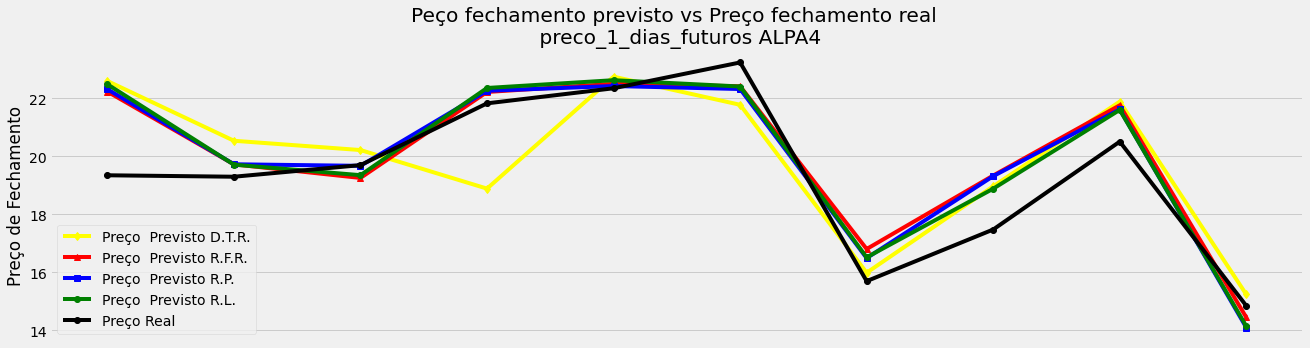

In [38]:
#plotando graficamente
sigla = "ALPA4"
df_final_prediction_acao =  df_final_prediction[df_final_prediction["sigla_acao"]==sigla].tail(10)
f = "preco_1_dias_futuros"
plt.figure(figsize=(20 ,5))
plt.title(f"Peço fechamento previsto vs Preço fechamento real \n {f} {sigla}")

plt.plot(df_final_prediction_acao["data_pregao"],df_final_prediction_acao[f"{f}_previsao_dtr"],\
         label="Preço  Previsto D.T.R.", color="yellow",marker="d")
plt.plot(df_final_prediction_acao["data_pregao"],df_final_prediction_acao[f"{f}_previsao_rfr"],\
         label="Preço  Previsto R.F.R.", color="red",marker="^")
plt.plot(df_final_prediction_acao["data_pregao"],df_final_prediction_acao[f"{f}_previsao_poly"],\
         label="Preço  Previsto R.P.", color="blue",marker="s")
plt.plot(df_final_prediction_acao["data_pregao"],df_final_prediction_acao[f"{f}_previsao_lr"],\
         label="Preço  Previsto R.L.", color="green",marker="o")
plt.plot(df_final_prediction_acao["data_pregao"], df_final_prediction_acao[f"{f}"],label="Preço Real", \
         color="black",marker="o")
#get current axes
ax = plt.gca()
#hide x-axis
ax.get_xaxis().set_visible(False)
plt.legend()
plt.xlabel("Data Pregão")
plt.ylabel("Preço de Fechamento")


Text(0, 0.5, 'Preço de Fechamento')

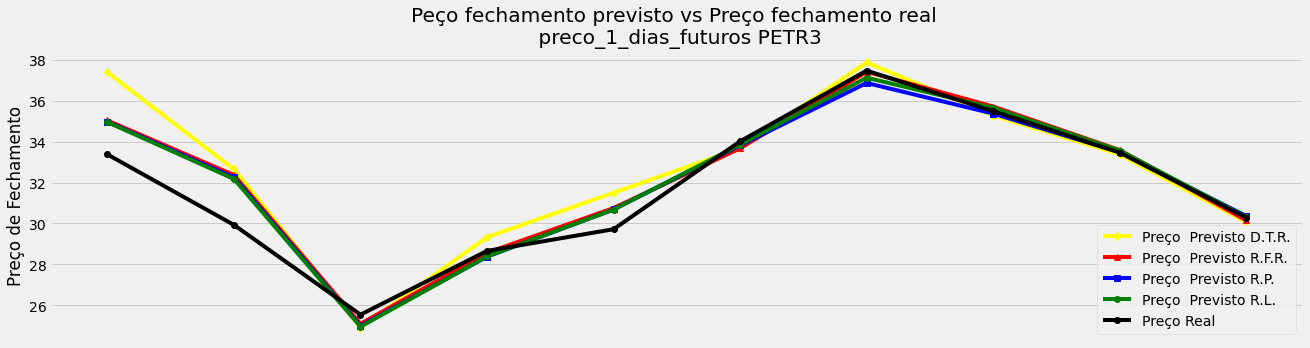

In [39]:
#plotando graficamente
sigla = "PETR3"
df_final_prediction_acao =  df_final_prediction[df_final_prediction["sigla_acao"]==sigla].tail(10)
f = "preco_1_dias_futuros"
plt.figure(figsize=(20 ,5))
plt.title(f"Peço fechamento previsto vs Preço fechamento real \n {f} {sigla}")
plt.plot(df_final_prediction_acao["data_pregao"],df_final_prediction_acao[f"{f}_previsao_dtr"],\
         label="Preço  Previsto D.T.R.", color="yellow",marker="d")
plt.plot(df_final_prediction_acao["data_pregao"],df_final_prediction_acao[f"{f}_previsao_rfr"],\
         label="Preço  Previsto R.F.R.", color="red",marker="^")
plt.plot(df_final_prediction_acao["data_pregao"],df_final_prediction_acao[f"{f}_previsao_poly"],\
         label="Preço  Previsto R.P.", color="blue",marker="s")
plt.plot(df_final_prediction_acao["data_pregao"],df_final_prediction_acao[f"{f}_previsao_lr"],\
         label="Preço  Previsto R.L.", color="green",marker="o")
plt.plot(df_final_prediction_acao["data_pregao"], df_final_prediction_acao[f"{f}"],label="Preço Real", \
         color="black",marker="o")
#get current axes
ax = plt.gca()
#hide x-axis
ax.get_xaxis().set_visible(False)
plt.legend()
plt.xlabel("Data Pregão")
plt.ylabel("Preço de Fechamento")

Text(0, 0.5, 'Preço de Fechamento')

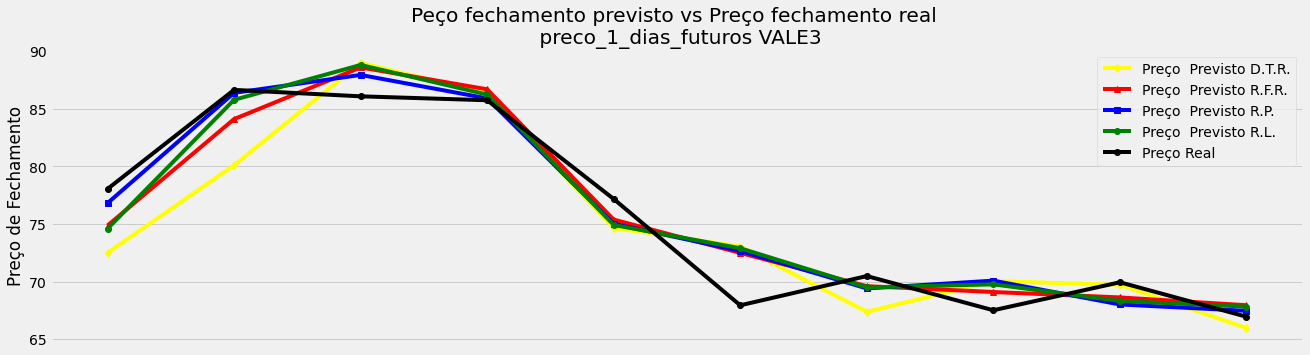

In [40]:
#plotando graficamente
sigla = "VALE3"
df_final_prediction_acao =  df_final_prediction[df_final_prediction["sigla_acao"]==sigla].tail(10)
f = "preco_1_dias_futuros"
plt.figure(figsize=(20 ,5))
plt.title(f"Peço fechamento previsto vs Preço fechamento real \n {f} {sigla}")
plt.plot(df_final_prediction_acao["data_pregao"],df_final_prediction_acao[f"{f}_previsao_dtr"],\
         label="Preço  Previsto D.T.R.", color="yellow",marker="d")
plt.plot(df_final_prediction_acao["data_pregao"],df_final_prediction_acao[f"{f}_previsao_rfr"],\
         label="Preço  Previsto R.F.R.", color="red",marker="^")
plt.plot(df_final_prediction_acao["data_pregao"],df_final_prediction_acao[f"{f}_previsao_poly"],\
         label="Preço  Previsto R.P.", color="blue",marker="s")
plt.plot(df_final_prediction_acao["data_pregao"],df_final_prediction_acao[f"{f}_previsao_lr"],\
         label="Preço  Previsto R.L.", color="green",marker="o")
plt.plot(df_final_prediction_acao["data_pregao"], df_final_prediction_acao[f"{f}"],label="Preço Real", \
         color="black",marker="o")
#get current axes
ax = plt.gca()
#hide x-axis
ax.get_xaxis().set_visible(False)
plt.legend()
plt.xlabel("Data Pregão")
plt.ylabel("Preço de Fechamento")

Text(0, 0.5, 'Preço de Fechamento')

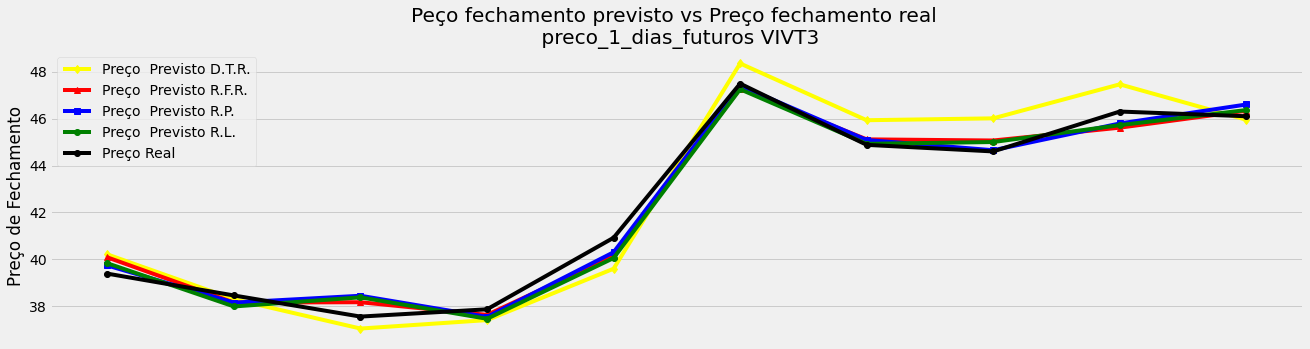

In [41]:
#plotando graficamente
sigla = "VIVT3"
df_final_prediction_acao =  df_final_prediction[df_final_prediction["sigla_acao"]==sigla].tail(10)
f = "preco_1_dias_futuros"
plt.figure(figsize=(20 ,5))
plt.title(f"Peço fechamento previsto vs Preço fechamento real \n {f} {sigla}")
plt.plot(df_final_prediction_acao["data_pregao"],df_final_prediction_acao[f"{f}_previsao_dtr"],\
         label="Preço  Previsto D.T.R.", color="yellow",marker="d")
plt.plot(df_final_prediction_acao["data_pregao"],df_final_prediction_acao[f"{f}_previsao_rfr"],\
         label="Preço  Previsto R.F.R.", color="red",marker="^")
plt.plot(df_final_prediction_acao["data_pregao"],df_final_prediction_acao[f"{f}_previsao_poly"],\
         label="Preço  Previsto R.P.", color="blue",marker="s")
plt.plot(df_final_prediction_acao["data_pregao"],df_final_prediction_acao[f"{f}_previsao_lr"],\
         label="Preço  Previsto R.L.", color="green",marker="o")
plt.plot(df_final_prediction_acao["data_pregao"], df_final_prediction_acao[f"{f}"],label="Preço Real", \
         color="black",marker="o")
#get current axes
ax = plt.gca()
#hide x-axis
ax.get_xaxis().set_visible(False)
plt.legend()
plt.xlabel("Data Pregão")
plt.ylabel("Preço de Fechamento")